# Проведение Exploratory Data Analysis (EDA)

## 0. ВВЕДЕНИЕ

В данном ноутбуке проводится анализ даннных датасета, который содержит информацию о поражениях кожи. 
В частности, выделяется две основные группы: 
- болезни рака кожи (базальноклеточная карцинома BCC, плоскоклеточная карцинома MEL, болезнь Боуэна SCC);
- кожные заболевания (актинический кератоз ACK, невус NEV, себорейный кератоз SEK).

Для анализа будут использованы такие инструменты как:
- Pandas (статистический анализ данных)
- Matplotlib, Seaborn, Plotly (визуализации)
- Pandera (валидация данных)

In [41]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandera.pandas as pa
from pandera import Column, DataFrameSchema, Check

# Добавляем настройки

pd.set_option('display.max_column', None)
# настроили отображение максимального количества столбцов
pd.set_option('display.max_rows', 100)
# настроили отображение максимального количества строк

print("Инструменты успешно импортированы и настройки проведены")

Инструменты успешно импортированы и настройки проведены


## 1. Понимание контекста и источников

Источником рассматриваемых данных первоначально является Kaggle:

https://www.kaggle.com/datasets/mahdavi1202/skin-cancer

Затем GoogleDrive:

https://drive.google.com/drive/folders/1HBtpv8kD75_lFkkOiwhrYzz9TcDml_OP?usp=sharing

Данные представлены в фомате CSV

Производим импорт датасета из GoogleDrive:

In [42]:
File_ID = "1N7W2_t1fhUJxC2UiDAEkq706xU9LsZ4O"
# File_ID - ID файла (наш dataset) на Google Drive

File_url = f"https://drive.google.com/uc?id={File_ID}"
# File_url - расположение файла

raw_data = pd.read_csv(File_url)
# читаем файл

print("Датасет импортирован успешно")
print(f"Датасет имеет {raw_data.shape[0]} строк и {raw_data.shape[1]} столбцов.")

Датасет импортирован успешно
Датасет имеет 1468 строк и 26 столбцов.


Импорт прошёл успешно, получен датасет из 1468 строк и 26 столбцов.

## 2. Структурная проверка

### Цель: 
Удостовериться, что даннык можно безопасно загружать и обрабатывать

Начнём с проверки структуры:

- Проверим наличие всех ожидаемых столбцов (должно быть 26)


In [43]:
# Выводим первые 10 строк датасета для проверки
print("Первые 10 строк датасета")
display(raw_data.head(10))

print(f"\nКоличество столбцов {raw_data.shape[1]} из 26")

Первые 10 строк датасета


,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_10,18,True,False,GERMANY,GERMANY,69,False,MALE,False,False,True,False,1.0,ARM,13.0,9.0,SCC,TRUE,UNK,FALSE,UNK,FALSE,TRUE,PAT_10_18_830.png,True
1,PAT_720,1362,False,True,GERMANY,GERMANY,54,False,FEMALE,False,True,True,True,2.0,ARM,11.0,10.0,BCC,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,PAT_720_1362_700.png,True
2,PAT_7380,1552,False,False,POMERANIA,POMERANIA,57,True,FEMALE,True,True,False,True,2.0,BACK,3.0,3.0,SEK,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,PAT_738_1552_502.png,False
3,PAT_32,44,False,True,POLAND,POLAND,64,False,FEMALE,True,True,True,True,2.0,FACE,7.0,5.0,BCC,FALSE,UNK,FALSE,UNK,FALSE,TRUE,PAT_32_44_211.png,True
4,PAT_1906,3798,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARM,NaN,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,PAT_1906_3798_588.png,False
5,PAT_1161,578,NaN,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEST,NaN,NaN,NEV,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,PAT_1161_578_233.png,False
6,PAT_1064,273,NaN,NaN,NaN,NaN,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOREARM,NaN,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1064_273_980.png,False
7,PAT_1715,3186,NaN,NaN,NaN,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOREARM,NaN,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1715_3186_948.png,False
8,PAT_1705,3143,NaN,NaN,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FACE,NaN,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1705_3143_139.png,False
9,PAT_514,967,True,True,GERMANY,GERMANY,64,True,MALE,True,True,True,True,3.0,FACE,10.0,8.0,BCC,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,PAT_514_967_300.png,True



Количество столбцов 26 из 26


- Выведем информацию о датасете

In [44]:
print("Исходные типы данных в датасете\n")
print(raw_data.info())

Исходные типы данных в датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           1468 non-null   object 
 1   lesion_id            1468 non-null   int64  
 2   smoke                872 non-null    object 
 3   drink                872 non-null    object 
 4   background_father    869 non-null    object 
 5   background_mother    867 non-null    object 
 6   age                  1468 non-null   int64  
 7   pesticide            872 non-null    object 
 8   gender               872 non-null    object 
 9   skin_cancer_history  872 non-null    object 
 10  cancer_history       872 non-null    object 
 11  has_piped_water      872 non-null    object 
 12  has_sewage_system    872 non-null    object 
 13  fitspatrick          872 non-null    float64
 14  region               1468 non-null   object 
 15  diame

Сравнив выведенную информацию об исходных типах данных с выведенными первыми 10 строками датасета можно увидеть, что некоторые из типов данных определены некорректно:

+ smoke, drink, pesticide, skin_cancer_history, cancer_history, has_piped_water, has_sewage_system необходимо определять как bool

+ gender, dianostic, itch, grew, hurt, changed, bleed, elevation необходимо определять как category

Остальные типы исходных данных определены правильно.

Необходимо скорректировать типы исходных данных, поэтому производим приведение типов:


In [45]:
# Приведение к типу bool
raw_data["smoke"] = raw_data["smoke"].astype("bool")
raw_data["drink"] = raw_data["drink"].astype("bool")
raw_data["pesticide"] = raw_data["pesticide"].astype("bool")
raw_data["skin_cancer_history"] = raw_data["skin_cancer_history"].astype("bool")
raw_data["cancer_history"] = raw_data["cancer_history"].astype("bool")
raw_data["has_piped_water"] = raw_data["has_piped_water"].astype("bool")
raw_data["has_sewage_system"] = raw_data["has_sewage_system"].astype("bool")

# Приведение к типу category
raw_data["gender"] = raw_data["gender"].astype("category")
raw_data["diagnostic"] = raw_data["diagnostic"].astype("category")
raw_data["itch"] = raw_data["itch"].astype("category")
raw_data["grew"] = raw_data["grew"].astype("category")
raw_data["hurt"] = raw_data["hurt"].astype("category")
raw_data["changed"] = raw_data["changed"].astype("category")
raw_data["bleed"] = raw_data["bleed"].astype("category")
raw_data["elevation"] = raw_data["elevation"].astype("category")

print("Типы данных после приведения\n")
print(raw_data.info())

Типы данных после приведения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   patient_id           1468 non-null   object  
 1   lesion_id            1468 non-null   int64   
 2   smoke                1468 non-null   bool    
 3   drink                1468 non-null   bool    
 4   background_father    869 non-null    object  
 5   background_mother    867 non-null    object  
 6   age                  1468 non-null   int64   
 7   pesticide            1468 non-null   bool    
 8   gender               872 non-null    category
 9   skin_cancer_history  1468 non-null   bool    
 10  cancer_history       1468 non-null   bool    
 11  has_piped_water      1468 non-null   bool    
 12  has_sewage_system    1468 non-null   bool    
 13  fitspatrick          872 non-null    float64 
 14  region               1468 non-null   objec

Теперь создадим схему валидации данных с использованием pandera и проведём валидацию

In [46]:
# Создание схемы валидации
schema = DataFrameSchema(
    {
        'patient_id': Column(object, nullable=False),
        # уникальный идентификатор пациента, не может отсутствовать

        'lesion_id': Column(int, checks=Check.greater_than(0), nullable=False),
        # идентификатор исследуемого места поражения, не может принимать отрицательные значения и отсутствовать

        'smoke': Column(bool, nullable=True),
        'drink': Column(bool, nullable=True),
        'pesticide': Column(bool, nullable=True),
        'skin_cancer_history': Column(bool, nullable=True),
        'cancer_history': Column(bool, nullable=True),
        'has_piped_water': Column(bool, nullable=True), 
        'has_sewage_system': Column(bool, nullable=True),
        
        'itch': Column(pa.Category, checks=Check.isin(["TRUE", "FALSE", "UNK"]), nullable=False), 
        'grew': Column(pa.Category, checks=Check.isin(["TRUE", "FALSE", "UNK"]), nullable=False), 
        'hurt': Column(pa.Category, checks=Check.isin(["TRUE", "FALSE", "UNK"]), nullable=False), 
        'changed': Column(pa.Category, checks=Check.isin(["TRUE", "FALSE", "UNK"]), nullable=False), 
        'bleed': Column(pa.Category, checks=Check.isin(["TRUE", "FALSE", "UNK"]), nullable=False), 
        'elevation': Column(pa.Category, checks=Check.isin(["TRUE", "FALSE", "UNK"]), nullable=False), 
        
        'biopsed': Column(bool, nullable=False),
        # различные характеристики, показывающие наличие/отсутствие данного фактора у пациента либо не предоставление информации о нем

        'background_father': Column(object, nullable=True),
        'background_mother': Column(object, nullable=True),
        # Информация о родительских болезнях, может отсутствовать

        'age': Column(int, checks=Check.greater_than(0), nullable=False),
        # Возраст пациента, не может быть отрицательным и отсутствовать

        'gender': Column(pa.Category, checks=Check.isin(["FEMALE", "MALE","UNK"]), nullable=True),
        # Информация о поле пациента, может быть не указана

        'fitspatrick': Column(float, nullable=True),
        # Информация о чувствительности кожи к солнечному свету, может быть неизвестна

        'region': Column(object, nullable=False),
        # Информация о месте поражения

        'diameter_1': Column(float, nullable=True),
        'diameter_2': Column(float, nullable=True),
        # Информация о диаметре области поражения при первом и втором измерении

        'diagnostic': Column(pa.Category, checks=Check.isin(["BCC", "ACK", "NEV", "SEK", "SCC", "MEL"]), nullable=False),
        # Информация о диагнозе пациента, не может отсутствовать

        'img_id': Column(object, nullable=False),
        # Идентификатор изображения пораженного участка кожи, не может отсутствовать

    },
    # Автоматическое приведение типов
    coerce=True
)

print("Схема валидации успешно создана")

# Проведение валидации
print("\nИдёт процесс валидации")

try:
    schema.validate(raw_data)
    print("\nВалидация прошла успешно!")
except pa.errors.SchemaError as exc:
    print(f"\nВ процессе валидации обнаружено {len(exc.failure_cases)} ошибок\n")
    print(exc)

Схема валидации успешно создана

Идёт процесс валидации

Валидация прошла успешно!


### Выводы:
- все ожидаемые 26 столбцов обнаружены
- неправильно определенные типы данных приведены к необходимым
- валидация по схеме проведена успешна и ошибок не обнаружено

####  Данные можно безопасно выгружать и обрабатывать

## 3. Оценка целостности и полноты

### Цель:
Понять, можно ли считать данные достоверными и полными для выгрузки

- Проводим подсчёт доли пропусков по полям

In [47]:
# Подсчёт доли пропусков
missing_values = pd.DataFrame(
    {
        'Доля пропусков (%)': (raw_data.isna().mean() * 100).round(2),
        'Заполнено значениями': raw_data.notna().sum()
    }
)

missing_values = missing_values.sort_values('Доля пропусков (%)', ascending=False)

print("Идёт подсчёт пропусков\n \nДанные о пропусках по столбцам")
display(missing_values)
        

Идёт подсчёт пропусков
 
Данные о пропусках по столбцам


,Доля пропусков (%),Заполнено значениями
background_mother,40.94,867
background_father,40.80,869
gender,40.60,872
diameter_2,40.60,872
diameter_1,40.60,872
fitspatrick,40.60,872
smoke,0.00,1468
patient_id,0.00,1468
lesion_id,0.00,1468
drink,0.00,1468


Пропуски обнаружены в столбцах: background_mother, background_father, gender, diameter_2, diameter_1, fitspatrick

- Проверяем уникальность записей

In [48]:
# Проверка уникальности записей

print("\nИдёт проверка уникальности записей")
print(f"\nОбщее количество записей: {raw_data.shape[0]}")
print(f"\nУникальных записей: {raw_data.drop_duplicates().shape[0]}")
uniqueness_ratio = raw_data.drop_duplicates().shape[0] / raw_data.shape[0]
print(f"\nОтношение уникальных строк к общему: {uniqueness_ratio:.4f}")

if uniqueness_ratio < 1:
    print("\nНайдены дубликаты записей!")
    duplicated = raw_data[raw_data.duplicated()]
    print(f"\nКоличество дублирующихся записей: {len(duplicated)}")
    print("\nПримеры дубликатов:")
    display(duplicated.head(10))
else:
    print("\nВсе записи уникальны!")


Идёт проверка уникальности записей

Общее количество записей: 1468

Уникальных записей: 1468

Отношение уникальных строк к общему: 1.0000

Все записи уникальны!


- Оцениваем полноту

Идёт проверка полноты данных

patient_id             1.000000
lesion_id              1.000000
smoke                  1.000000
drink                  1.000000
background_father      0.591962
background_mother      0.590599
age                    1.000000
pesticide              1.000000
gender                 0.594005
skin_cancer_history    1.000000
cancer_history         1.000000
has_piped_water        1.000000
has_sewage_system      1.000000
fitspatrick            0.594005
region                 1.000000
diameter_1             0.594005
diameter_2             0.594005
diagnostic             1.000000
itch                   1.000000
grew                   1.000000
hurt                   1.000000
changed                1.000000
bleed                  1.000000
elevation              1.000000
img_id                 1.000000
biopsed                1.000000
dtype: float64


C:\Users\Alexandra\AppData\Local\Temp\ipykernel_9028\3419513971.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




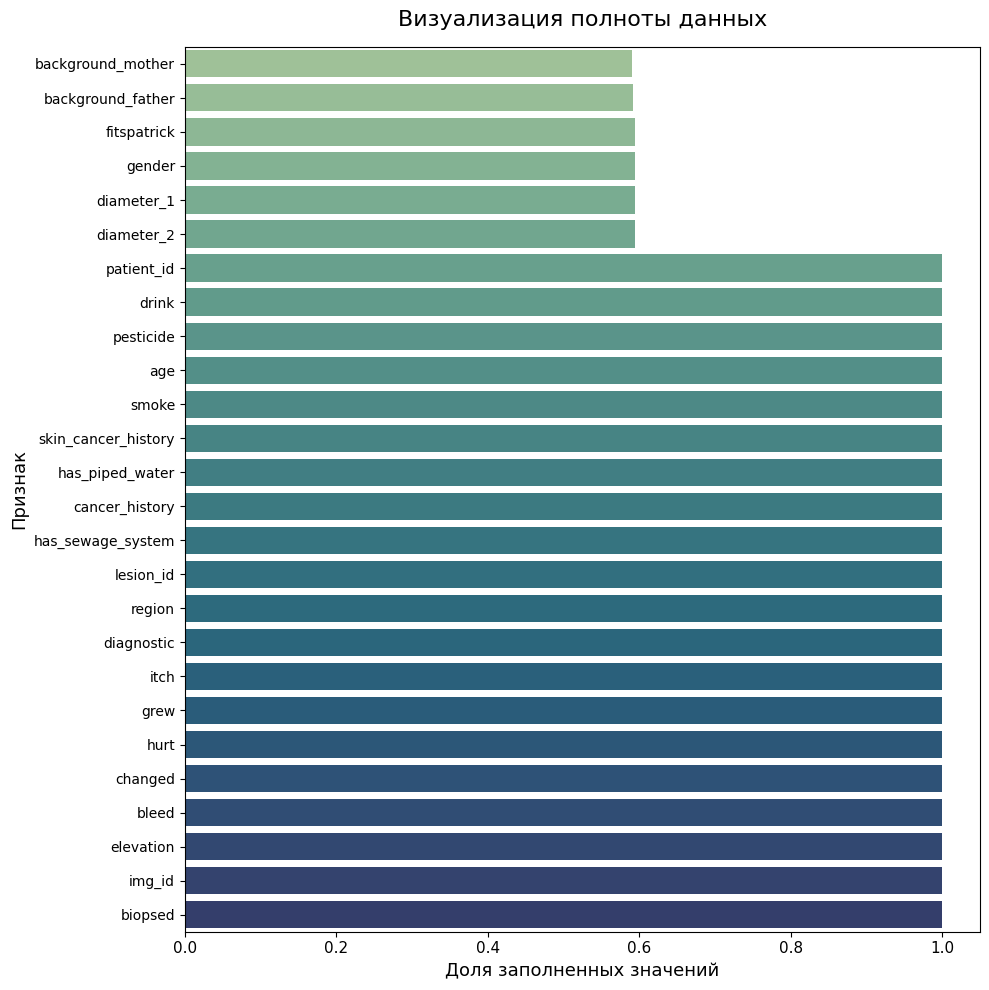

Средняя полнота данных: 0.906


In [49]:
# Проверка полноты

print("Идёт проверка полноты данных\n")
completeness = raw_data.notnull().mean()
print(completeness)

completeness = 1 - (raw_data.isnull().sum() / len(raw_data))
completeness_data = completeness.reset_index()
completeness_data.columns = ['column', 'completeness']
completeness_data = completeness_data.sort_values(by='completeness', ascending=True)

plt.figure(figsize=(10, 10))
sns.barplot(
    data=completeness_data,
    x='completeness',
    y='column',
    palette='crest'
)
plt.title("Визуализация полноты данных", fontsize=16, pad=15)
plt.xlabel("Доля заполненных значений", fontsize=13)
plt.ylabel("Признак", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

avg_completeness = completeness.mean()
print(f"Средняя полнота данных: {avg_completeness:.3f}")


### Выводы:
- Обнаружены столбцы с пропусками: background_mother, background_father, gender, diameter_2, diameter_1, fitspatrick.
- Доказана уникальность всех записей, соотвествует необходимому показателю равному "1".
- Полнота данных составляет 0,906, что является ниже порогового значения 0,98. Таким образом полнота данных не соответствует нормативу.

####  Проблемы:
Недостаточная полнота данных, большое количество пропусков в столбцах (background_mother, background_father, gender, diameter_2, diameter_1, fitspatrick)

####  Рекомендуемые решения для данного датасета:
- в столбцах background_mother, background_father, gender, fitspatrick заполнить пропуски значениями UNK("неизвестно"), так как они важны для оценки зависимости от них вида заболевания
- столбцы diameter_2, diameter_1 удалить, так как не имеют особой значимости (нет возможности оценить ход течения заболевания по данным признакам, потому как неизвестен период через который были получены значения diameter_2 относительно diameter_1).


Заполним пропуски в столбце "gender" для рассмотрения полноты данных по основным признакам путем динамической визуализации.

In [51]:
# Добавление динамической визуализации


fig = make_subplots(rows=2, cols=2,
                    specs=[[{"type": "domain"}, {"type": "xy"}],
                           [{"type": "xy"}, {"type": "xy"}]],
                    subplot_titles=(
                        "Распределение по виду кожных поражений",
                        "Распределение по возрасту",
                        "Распределение по полу",
                        "Зависимость вида поражения кожи от возраста"
                    )
)

diagnostic = raw_data['diagnostic'].value_counts()
fig.add_trace(
    go.Pie(
        labels=diagnostic.index.tolist(),
        values=diagnostic.values.tolist(),
        marker=dict(colors=px.colors.sequential.Viridis)
        ),
    row=1, col=1
)

age = raw_data['age'].value_counts()
fig.add_trace(
    go.Histogram(
        x=age.index,
        y=age.values,
        marker_color='indigo'
        ),
    row=1, col=2
)

data_without_nan = raw_data['gender'].cat.add_categories("UNK").fillna("UNK")
gender = data_without_nan.value_counts()
fig.add_trace(
    go.Bar(
        x=gender.index,
        y=gender.values,
        marker_color=px.colors.sequential.Viridis
        ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=raw_data['age'],
        y=raw_data['diagnostic'],
        mode='markers',
        marker=dict(color='mediumaquamarine')
        ),
    row=2, col=2
)

fig.update_xaxes(title_text="Возраст", row=1, col=2)
fig.update_xaxes(title_text="Возраст", row=2, col=2)
fig.update_yaxes(title_text="Количество", row=1, col=2)
fig.update_yaxes(title_text="Количество", row=2, col=1)
fig.update_layout(height=800)

fig.show()

#### Заключение по полученным графикам:
1. Наблюдается преобладание пациентов с двумя кожными поражениями, такими как актинический кератоз(ACK) и базальноклеточная карцинома(BCC), каждое из которых относится к одной из двух рассматриваемых групп (кожные заболевания и болезни рака кожи).
  Таким образом можно сделать вывод о том, что оценка влияния различных признаков на людей с данными поражениями будет наиболлее достоверной, а также можно сказать о том, что было рассмотрено примерно равное количество пациентов с кожные заболеваниями и болезнями рака кожи.
2. Распределение пациентов по возрасту равномерно в промежутке от 20 до 89 лет. Однако встречаются и пациенты младше 20 и старше 89, что не является выбросом или аномалией, так как возраст человека может быть от 0 и до 120(максимально зарегистрированный рекорд). 
  Согласно полученному распределению наиболее достоверная оценка будет достигнута при рассмотре людей от 20 до 89 лет.
3. При построении распределения количества наблюдений от возраста можно увидеть, что у довольно большого количества пациентов он неизвестен.
  В связи с чем мы не сможем точно оценить зависимость заболевания от пола пациента.
4. Зависимость вида поражения кожи от возраста показывает, что для большинства заболеваний преобладает возрастной помежуток от 50 до 80 лет. Исключение составляет невус(NEV), к нему более склонны люди от 20 до 60. Наиболее однородное и схожее распределение по возрасту(от 30 до 91) имеют те поражения кожи, данные по которым встречаются в большем количестве.

## 4. Поиск выбросов и аномалий

### Цель:
Выявление экстремальных значений, влияющих на качество анализа

- Определяем долю аномальных значений в числовых признаках с помощью метода IQR

Идёт поиск выбросов и аномалий методом IQR

             ratio_outliers
diameter_2         0.039510
diameter_1         0.023842
age                0.016349
fitspatrick        0.006131


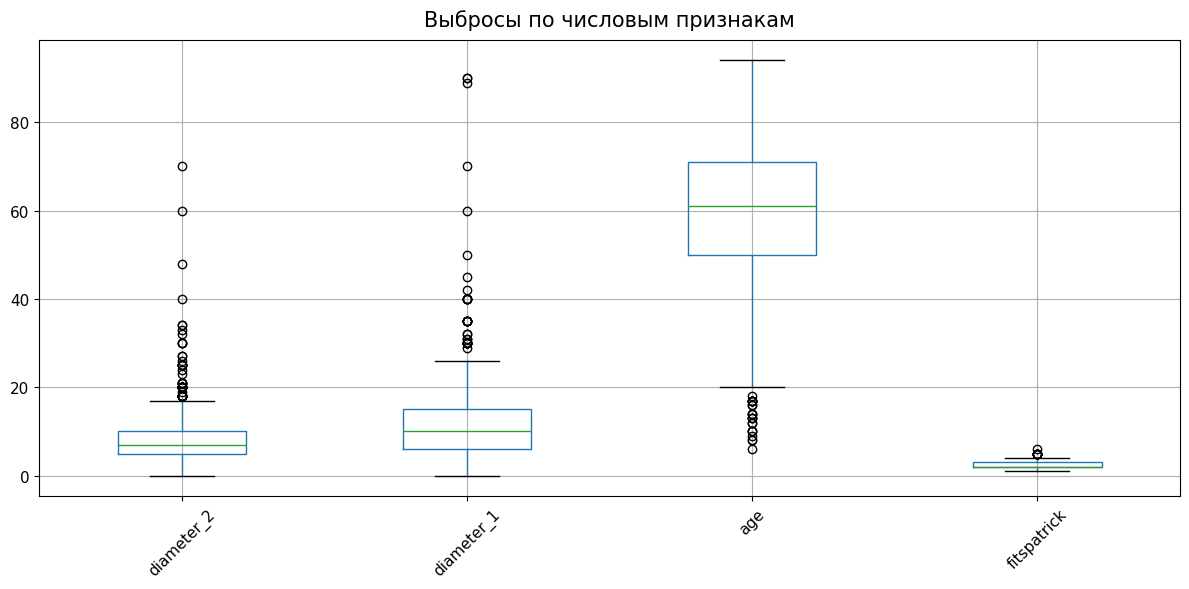


Средняя доля выбросов: 0.021


In [39]:
# Поиск выбросов и аномалий

print("Идёт поиск выбросов и аномалий методом IQR\n")

numeric_sign = raw_data.loc[:, ['age', 'diameter_1', 'diameter_2', 'fitspatrick']]
ratio_outliers = {}

for col in numeric_sign.columns:
    Q1 = numeric_sign[col].quantile(0.25)
    Q3 = numeric_sign[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = ((numeric_sign[col] < lower) | (numeric_sign[col] > upper)).sum()
    ratio_outliers[col] = outliers / len(raw_data)

outlier_data = pd.DataFrame.from_dict(ratio_outliers, orient='index', columns=['ratio_outliers']).sort_values(by='ratio_outliers', ascending=False)
print(outlier_data.head(10))

top_outlier_cols = outlier_data.head(4).index

plt.figure(figsize=(12,6))
raw_data[top_outlier_cols].boxplot()
plt.title("Выбросы по числовым признакам", fontsize=15, pad=10)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

avg_ratio_outliers = outlier_data['ratio_outliers'].mean()
print(f"\nСредняя доля выбросов: {avg_ratio_outliers:.3f}")



### Выводы:
Доля выбросов составляет 0,021, что превышает пороговое значение равное 0,020. Таким образом доля выбросов несильно, но тем не менее не соответствует нормативу.
Наибольшую долю аномальных значений равную 0.039510 имеет столбец diametr_2, что может свидетельствовать о реалистичности полученных значений, так как область поражения может иметь совершенно разные размеры и требуется экспертная оценка данного вопроса.

## 5. Метрики качества данных

#### Цель:

Получение информации о качестве данных путем их оценки метриками:
- Completeness - полнота данных (≥ 0.98)
- Uniqueness - уникальность записей (= 1.0)
- Outlier Ratio - доля выбросов (≤ 0.02)

In [40]:
# Оценка качества по метрикам
print("Идёт вывод метрик качества данных!\n")
print("Таблица метрик качества данных\n")

metrics = {}

metrics['Completeness'] = {
    'value': avg_completeness,
    'threshold': 0.98,
    'status': 'OK' if avg_completeness >= 0.98 else 'SOS!'
}

metrics['Uniqueness'] = {
    'value': uniqueness_ratio,
    'threshold': 1.0,
    'status': 'OK' if uniqueness_ratio == 1.0 else 'SOS!'
}

metrics['Outlier Ratio'] = {
    'value': avg_ratio_outliers,
    'threshold': 0.02,
    'status': 'OK' if avg_ratio_outliers <= 0.02 else 'SOS!'
}

metrics_df = pd.DataFrame({
    'Метрика': list(metrics.keys()),
    'Значение': [m['value'] for m in metrics.values()],
    'Порог': [m['threshold'] for m in metrics.values()],
    'Статус': [m['status'] for m in metrics.values()]
})

display(metrics_df)

# Общая оценка качества
passed_metrics = sum([1 for m in metrics.values() if m['status'] == 'OK'])
total_metrics = len(metrics)
quality_score = passed_metrics / total_metrics

print(f"Общая оценка качества данных: {quality_score*100:.1f}%")
print(f"Пройдено метрик: {passed_metrics} из {total_metrics}")

Идёт вывод метрик качества данных!

Таблица метрик качества данных



,Метрика,Значение,Порог,Статус
0,Completeness,0.906099,0.98,SOS!
1,Uniqueness,1.000000,1.00,OK
2,Outlier Ratio,0.021458,0.02,SOS!


Общая оценка качества данных: 33.3%
Пройдено метрик: 1 из 3


# ИТОГ

Проведён Exploratory Data Analysis (EDA) датасета кожных заболеваний, имеющего 1468 строк и 26 столбцов.

Общее качество данных датасета составило 33,3%, что является довольно низким показателем.

Его основными проблемами являются:
1. недостаточная полнота
2. превышение порога доли выбросов

Предлагается решить их следущими образами:
1. Недостаточную полноту можно повысить заполнением пропущенных значений или удалением столбцов в каждом конкретном случае
2. Провести экспертную оценку выбросов областей поражения кожных покровов